**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [Plot customization: Arranging Multiple Axes in a Figure (Docs)](#toc2_)    
- [Sub-figure (Docs)](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## <a id='toc2_'></a>Plot customization: Arranging Multiple Axes in a Figure ([Docs](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html)) [&#8593;](#toc0_)

It is often the case that more than one Axes are required in a figure and usually they are organized into a regular grid.

Matplotlib uses Axes to refer to the drawing area that contains data, x- and y-axis, ticks, labels, title, etc. Another term that is often used is "subplot", which refers to an Axes that is in a grid with other Axes objects.

The functions most commonly used for creating a grid of Axes objects are the `fig.subplots()` and `fig.subplot_mosaic()` functions. 

- The subplots function creates and places all Axes on the figure at once, and returns an array object with handles for the Axes in the grid. See [Figure.subplots](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots) for more detailed function documentation.

- The subplot_mosaic function is a simple way to create figures and a grid of Axes, with the added flexibility that Axes can also span rows or columns. The Axes are returned in a labelled dictionary instead of an array. See [Figure.subplot_mosaic](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplot_mosaic) for more detailed function documentation.

For creating complex grid layouts we should use the `subplot_mosaic()` function.

> The `subplot_mosaic(mosaic, *, sharex=False, sharey=False, width_ratios=None, height_ratios=None, empty_sentinel='.', subplot_kw=None, per_subplot_kw=None, gridspec_kw=None)` function

The function builds a layout of Axes based on ASCII art or nested lists.

<u> Function Parameters</u>

- mosaic: A visual layout of how you want your Axes to be arranged labeled as strings.
    - the layout can be a list of strings or a list of list of strings. think of it like a 2D matrix. For example -- 
        
            x = [['A panel', 'A panel', 'edge'],
                ['C panel', '.',       'edge']] 
            
        produces 4 Axes:
        
        - 'A panel' which is 1 row high and spans the first two columns

        - 'edge' which is 2 rows high and 1 column wide is on the right edge

        - 'C panel' which is 1 row high and 1 column wide in the bottom left

        - a blank space which is 1 row and 1 column wide in the bottom center

    Also, any of the entries in the layout can be a list of lists of the same form to create nested layouts.

    - if input is a str, then it can either be a multi-line string of the form --

            '''
            AAE
            C.E
            '''

    where each character is a column and each line is a row. Or it can be a single-line string where rows are separated by semi-colons (;) --

            'AAE;C.E'

    **Note:** The string notation allows only single character Axes labels and does not support nesting but is very terse (effectively concise).

- sharex, sharey (bool: default False): If True, the x-axis (sharex) or y-axis (sharey) will be shared among all subplots. 

- width_ratios (optional): array-like of length ncols. Defines the relative widths of the columns. Each column gets a relative width of width_ratios[i] / sum(width_ratios). If not given, all columns will have the same width. In the case of nested layouts, this argument applies only to the outer layout.

- height_ratios (optional): array-like of length nrows. Defines the relative heights of the rows. Each row gets a relative height of height_ratios[i] / sum(height_ratios). If not given, all rows will have the same height. In the case of nested layouts, this argument applies only to the outer layout.

**Returns:** dict(label: Axes). A dictionary mapping the labels to the Axes objects. The order of the axes is left-to-right and top-to-bottom of their position in the total layout.

In [2]:
# a function to put text on an Axes
def annotate_axes(axes, text):
    return axes.text(
        x=0.5, y=0.5, s=text, horizontalalignment="center", verticalalignment="center"
    )

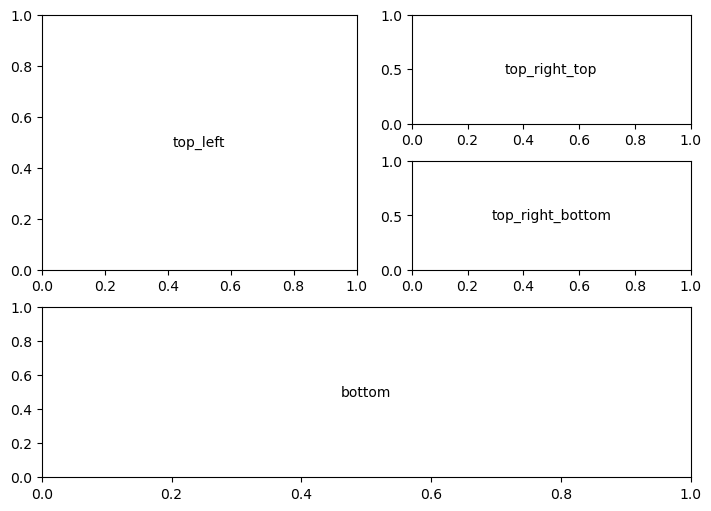

In [3]:
inner_layout = [["top_right_top"], 
                ["top_right_bottom"]]
outer_layout = [["top_left", inner_layout], 
                ["bottom", "bottom"]]

axd = plt.figure(figsize=(7, 5), layout="constrained").subplot_mosaic(
    mosaic=outer_layout, height_ratios=[3, 2])

for ax_names, axes in axd.items():
    annotate_axes(axes, ax_names)

In [4]:
axd

{'top_left': <Axes: label='top_left'>,
 'top_right_top': <Axes: label='top_right_top'>,
 'top_right_bottom': <Axes: label='top_right_bottom'>,
 'bottom': <Axes: label='bottom'>}

## <a id='toc3_'></a>Sub-figure ([Docs](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html)) [&#8593;](#toc0_)

SubFigure is a virtual figure within a figure.

Sometimes it is desirable to have a figure with two different layouts in it. This can be achieved with nested gridspecs, but having a virtual figure with its own artists is helpful, so Matplotlib also has "subfigures", accessed by calling `matplotlib.figure.Figure.add_subfigure()` or use `matplotlib.figure.Figure.subfigures()` to make an array of subfigures. Note that subfigures can also have their own child subfigures.

> The `subfigures(nrows=1, ncols=1, squeeze=True, wspace=None, hspace=None, width_ratios=None, height_ratios=None, **kwargs)` function is used for adding a set of subfigures to this figure or subfigure

**`Note:`** A subfigure has the same artist methods as a figure, and is logically the same as a figure, but cannot print itself.

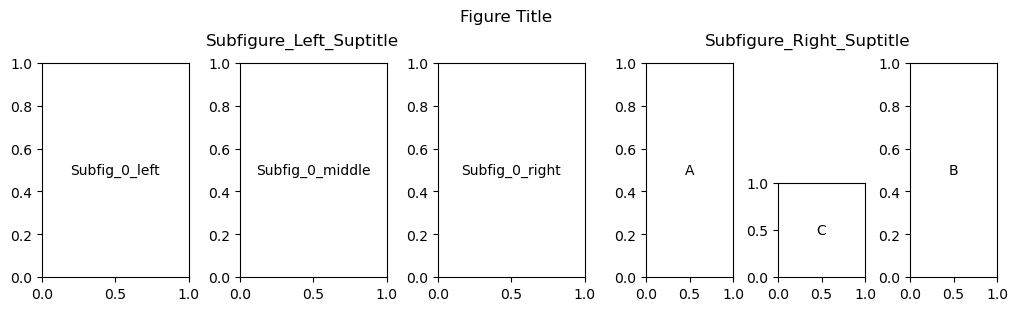

In [5]:
fig = plt.figure(figsize=(10, 3), layout="constrained")

subfigs = fig.subfigures(1, 2, width_ratios=[6, 4])

axd_0 = subfigs[0].subplot_mosaic(
    mosaic=[["Subfig_0_left", "Subfig_0_middle", "Subfig_0_right"]]
)
axd_1 = subfigs[1].subplot_mosaic(mosaic="A.B;ACB")  ## no extra space in between

for axes_title, axes in axd_0.items():
    annotate_axes(axes, axes_title)

for axes_title, axes in axd_1.items():
    annotate_axes(axes, axes_title)

subfigs[0].suptitle("Subfigure_Left_Suptitle")
subfigs[1].suptitle("Subfigure_Right_Suptitle")

fig.suptitle("Figure Title")

plt.show()